# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [3]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [4]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

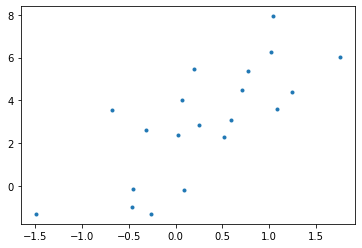

In [5]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [6]:
x_train = X[0:15]
y_train = Y[0:15]
x_test  = X[15:]
y_test  = Y[15:]
def regression(X, Y, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta
def predict(theta,X):
    n = len(theta)
    degrees = reversed(range(n))

    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees):
        Y += w * X**d
    return Y

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

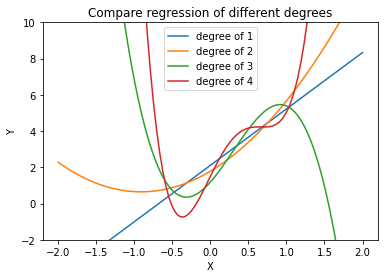

In [7]:
x_model = np.linspace(-2, 2, 100)

for i in range (2,6):
    coef1 = regression(x_train, y_train, i)
    y_model = predict(coef1, x_model)
    plt.plot(x_model, y_model, label="degree of {}".format(i-1))
plt.ylim(-2, 10)
plt.title("Compare regression of different degrees")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


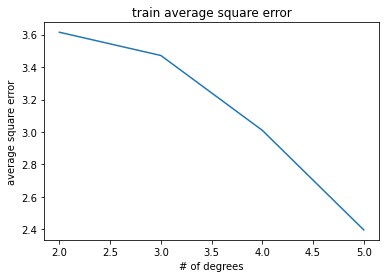

[3.614119980936591, 3.4709875708912987, 3.010246815533374, 2.3971661654711824]


In [8]:
Ss_test = []
Ns_test = []
Ss = []
Ns = []
for n in range(2, 6):#求出1-4次多项式拟合值与实际值的均方差
    theta = regression(x_train, y_train, n)
    Yhat = predict(theta,x_train)
    E = y_train - Yhat
    S = np.dot(E, E) / len(y_train)
    Ss.append(S)
    Ns.append(n)
plt.plot(Ns, Ss, label="train")
plt.title("train average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.show()
print(Ss)


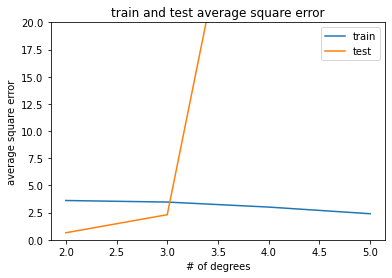

In [9]:
for n in range(2, 6):#求出训练集所拟合的函数对测试集的拟合效果
    theta = regression(x_train, y_train, n)
    Yhat_test = predict(theta,x_test)
    E = y_test - Yhat_test
    S = np.dot(E, E) / len(y_train)
    Ss_test.append(S)
    Ns_test.append(n)
plt.plot(Ns, Ss, label="train")
plt.plot(Ns_test, Ss_test, label="test")
plt.title("train and test average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.legend()
plt.ylim(0, 20)
plt.show()


In [10]:
min_Ss_value = min(Ss)
min_Ss_idx = Ss.index(min_Ss_value)
print("均方差：{}".format(Ss))
print("在1.2问题中，{}次多项式函数与训练数据拟合最好".format(min_Ss_idx+1))

均方差：[3.614119980936591, 3.4709875708912987, 3.010246815533374, 2.3971661654711824]
在1.2问题中，4次多项式函数与训练数据拟合最好


### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

1.2和1.3的答案是否相同？两者的异同有什么意义？

In [11]:
min_Ss_test_value = min(Ss_test)
min_Ss_test_idx = Ss_test.index(min_Ss_test_value)
print("均方差：{}".format(Ss_test))
print("在1.3问题中，{}次多项式函数与训练数据拟合最好".format(min_Ss_test_idx+1))
print("1.2与1.3的答案不相同，1.2里面使用训练集进行测试会出现过拟合现象，故两次测试出的不同才能有效验证模型的有效性")

均方差：[0.6457762674229708, 2.3082953054205317, 48.51276392897358, 905.8332589335402]
在1.3问题中，1次多项式函数与训练数据拟合最好
1.2与1.3的答案不相同，1.2里面使用训练集进行测试会出现过拟合现象，故两次测试出的不同才能有效验证模型的有效性


## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

In [27]:
#relu公式：y = max (0, x)
#sigmoid公式： y = 1/ (1 + e ^(-x))
#神经网络公式：net1=W_1*x+B_1  out1=1/(1 + e ^(-net1))  net2=W_2*out1+B_2     out2=max (0, net2)

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [39]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [40]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [41]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [42]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [43]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [44]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [45]:
b2 = np.array([[0.277288]])

In [46]:
import numpy as np
#Sigmoid激活函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#RELU激活函数
def relu(z):
    return np.maximum(z, 0)

# 正向传播
Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2) + b2
Y_pred = relu(Z2)

# 计算损失
L = np.sum((Y_pred - Y)**2)

print("预测输出值：\n", Y_pred)
print("损失值：", L)

预测输出值：
 [[2.18514844]
 [1.35081552]
 [2.09965131]
 [1.98338406]]
损失值： 11.22755532709232


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [47]:
dL_dy = 2 * (Y_pred - Y)
dy_dz2 = np.where(Z2 > 0, 1, 0)
dL_dz2 = dL_dy * dy_dz2
dz2_dw2 = A1.T
dL_dw2 = np.dot(dz2_dw2, dL_dz2)
dL_db2 = dL_dz2

dz2_da1 = W2.T
dL_da1 = np.dot(dL_dz2, dz2_da1)
da1_dz1 = sigmoid(Z1) * (1 - sigmoid(Z1))
dL_dz1 = dL_da1 * da1_dz1
dz1_dw1 = X.T
dL_dw1 = np.dot(dz1_dw1, dL_dz1)
dL_db1 = dL_dz1

print("L对W1偏导数分别为：\n", dL_dw1)
print("L对B1偏导数分别为：\n", dL_db1)
print("L对W2偏导数分别为：\n", dL_dw2)
print("L对B2偏导数分别为：\n", dL_db2)

L对W1偏导数分别为：
 [[-0.40251271 -0.00182187  0.04910962 -0.51554188 -0.18737055]
 [ 0.64416028 -0.01111573  0.81370538  0.2788146   0.57317828]]
L对B1偏导数分别为：
 [[ 5.96287054e-01 -1.06079547e-02  7.92395279e-01  3.02740712e-01
   5.92534406e-01]
 [ 4.27561171e-01 -1.00047686e-03  1.54840219e-01  5.08719191e-01
   3.41974444e-01]
 [ 1.13285714e-01 -1.70961826e-03  1.21646635e-01  5.47587806e-02
   1.04113138e-01]
 [ 6.76504116e-01 -1.40129193e-02  1.10283004e+00  5.72657502e-01
   1.07059870e+00]]
L对W2偏导数分别为：
 [[4.8221678 ]
 [5.34072698]
 [2.64623548]
 [9.70428608]
 [4.25731321]]
L对B2偏导数分别为：
 [[3.67143694]
 [2.50570313]
 [0.58695233]
 [4.98073397]]
